# FLOW, inc. 若水國際 Disability Employment Analysis

## 探討的問題
1. 我們是否可以找到外在特質和內在特質的 correlation?
2. 如果 1. 可行，我們是否可以只利用外在特質成功判斷 candidate 是否為關鍵 TA?
3. 我們是否可以加上基本分析找出關鍵 TA的管道給若水一個 insight

## Layout
1. 文字雲定義六大特質
2. 基本資料分析
    - 關鍵TA雷達圖 vs 非關鍵TA雷達圖
    - 關鍵TA學歷分析
    - 關鍵TA求職考量分析
    - 關鍵TA經歷分析
    - 關鍵TA管道分析
3. Feature Correlation 特質關係度分析
4. 建模預測特質與

## 基本資料分析

In [6]:
import pandas as pd
import numpy as np
from typing import List
import os
os.chdir("/Users/franklu/Workspace/flow/flow-disability-employment/")
!ls

README.md                   poetry.lock
dashboard.py                pyproject.toml
data                        score_exploration.ipynb
interview_exploration.ipynb


In [7]:
FILE_PATH = "./data/scores.csv"
inside_features = ['工作意願和動機', '學習動力','基本溝通表達', '工作責任感', '解決問題意願']
outside_features = ['社群和社交活動', '家人支持程度', '私人企業工作經驗', '量化求職考量','先天後天', '自我身心照顧']
meta_features = ['受訪者','內外部','障別','問卷求職管道','問卷學歷','經歷','求職考量']
target = ['關鍵TA']
def read_data(file_path, ppss=False) -> List[pd.DataFrame]:
    """
    Read data from csv file and return 3 dataframes
    """
    scores_df = pd.read_csv(file_path)
    if not ppss:
        scores_df = scores_df[meta_features + inside_features + outside_features + target] 
    ta_df = scores_df[scores_df["關鍵TA"] == "T"]
    ta_df.reset_index(drop=True, inplace=True)
    nonta_df = scores_df[scores_df["關鍵TA"] == "F"]
    nonta_df.reset_index(drop=True, inplace=True)
    return [scores_df, ta_df, nonta_df]

scores_df, ta_df, nonta_df = read_data(FILE_PATH)
num_ta, num_nonta = len(ta_df), len(nonta_df)
scores_df

,受訪者,內外部,障別,問卷求職管道,問卷學歷,經歷,求職考量,工作意願和動機,學習動力,基本溝通表達,工作責任感,解決問題意願,社群和社交活動,家人支持程度,私人企業工作經驗,量化求職考量,先天後天,自我身心照顧,關鍵TA
0,0913H,外部,腦性麻痺,社群貼文,研究所,學校,無障礙環境、工作性質與內容,4,3,3,3,3,2,2,0,3,1,6,T
1,0913I,外部,脊髓損傷,網路人力銀行、親友介紹,國中,非營利組織,經濟需求、無障礙環境,2,1,0,1,0,2,1,0,1,0,2,F
2,0915J,外部,腦性麻痺,網路人力銀行、公立政府就業服務、自行創業/自由接案,大學/大專,學校,經濟需求、工作性質與內容,5,2,2,3,2,2,1,0,1,1,6,T
3,0916K,外部,聽障,學校公告、網路人力銀行、就業徵才博覽會、公立政府就業服務,大學/大專,私人企業,工作性質與內容、交通距離、友善職場、經濟需求,3,1,1,1,2,0,0,1,2,1,2,F
4,0920L,外部,肌肉萎縮,網路人力銀行、公立政府就業服務、社群貼文,研究所,學校,經濟需求、無障礙環境、工作性質與內容,3,2,1,3,3,3,4,0,2,1,3,T
5,0920M,外部,脊髓損傷,網路人力銀行、公立政府就業服務,高中/職,非營利組織,經濟需求、無障礙環境,4,1,3,2,2,3,3,0,2,0,4,F
6,0924N,外部,軟骨發育不全,公立政府就業服務、親友介紹、非營利組織轉介,大學/大專,非營利組織,經濟需求、無障礙環境、工作性質與內容,3,1,1,1,1,1,1,0,1,1,2,F
7,0924O,外部,脊髓損傷,網路人力銀行,大學/大專,非營利組織,無障礙環境、交通距離-捷運站近,3,1,1,1,0,1,0,0,1,1,3,F
8,0926P,外部,聽障,非營利組織轉介,高中/職,私人企業,經濟需求,1,1,1,0,1,1,2,1,1,1,0,F
9,0929Q,外部,聽障,網路人力銀行,高中/職,私人企業,經濟需求、工作性質與內容,5,3,3,3,3,3,2,1,2,1,6,T


In [8]:
print(f"關鍵TA: {num_ta} 位 \n非關鍵TA: {num_nonta} 位")

關鍵TA: 21 位 
非關鍵TA: 11 位


## 建模
會利用 `logistic regression` 和 `support vector machine` 來建模並比較兩種建模的準確度

### Features
外在特質: `['社群和社交活動', '家人支持程度', '私人企業工作經驗', '量化求職考量','先天後天', '自我身心照顧']`

內用特質: `['工作意願和動機', '學習動力','基本溝通表達', '工作責任感', '解決問題意願']`

PPSS特質: `['PPSS積極性', 'PPSS責任性', 'PPSS成熟性', 'PPSS務實性', 'PPSS社交性','PPSS合群性', 'PPSS創意性', 'PPSS表達性', 'PPSS學習性', 'PPSS細心', 'PPSS耐心', 'PPSS親和性', 'PPSS領導性', 'PPSS邏輯性']`
 
* **模型一**: 內在特質 logistic regression
* **模型二**: 外在特質 logistic regression
* **模型三**: 內+外在特質 logistic regression
* **模型四**: PPSS logistic regression
* **模型五**: 內在特質 SVM
* **模型六**: 外在特質 SVM
* **模型七**: 內 + 外在特質 SVM
* **模型八**: PPSS SVM

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


inside_features = ['工作意願和動機', '學習動力','基本溝通表達', '工作責任感', '解決問題意願']
outside_features = ['社群和社交活動', '家人支持程度', '私人企業工作經驗', '量化求職考量','先天後天', '自我身心照顧']
target = '關鍵TA'


def svm_model(df, features, target='關鍵TA', test_size=0.2, random_state=42):
    encoder = LabelEncoder()
    df[target] = encoder.fit_transform(df[target])
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=test_size, random_state=random_state)
    len_training = len(X_train)
    len_testing = len(X_test)
    print(f'用{len_training}位訓練，{len_testing}位盲測')

    classifier = SVC(kernel='rbf', random_state=random_state)
    classifier.fit(X_train, y_train)

    
    # Train the classifier using only the outside_features from the training set
    classifier.fit(X_train[features], y_train)
    
    # Predict the target for the test set
    y_pred = classifier.predict(X_test[features])
    
    # Calculate the accuracy and other performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred)
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Classification Report:{classification_rep}")
    return classifier

svm = svm_model(scores_df, inside_features + outside_features)

用25位訓練，7位盲測
Training Accuracy: 0.92
Testing Accuracy: 1.0
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



用25位訓練，7位盲測


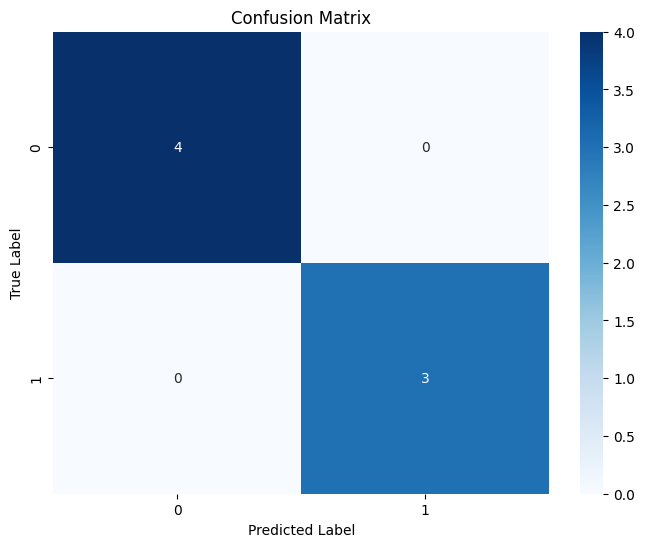

Training Accuracy: 0.96
Testing Accuracy: 1.0
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [74]:
def logistic_regression_model(df, features, target='關鍵TA', test_size=0.2, random_state=42):
    encoder = LabelEncoder()
    df[target] = encoder.fit_transform(df[target])
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    len_training = len(X_train)
    len_testing = len(X_test)
    print(f'用{len_training}位訓練，{len_testing}位盲測')
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)

    def _plot_confusion_matrix(y_test, y_test_pred):
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    # Evaluation
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred)
    _plot_confusion_matrix(y_test, y_test_pred)
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Classification Report:{classification_rep}")
    return classifier

lrm = logistic_regression_model(scores_df, inside_features)

# Bootstrapping

In [67]:
# Load the dataset
def logistic_regression_bootstrap(df,features,target='關鍵TA', test_size=0.2, random_state=42, n_bootstraps=100):
    df = scores_df.copy()    
    encoder = LabelEncoder()
    df[target] = encoder.fit_transform(df[target])
    
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=test_size, random_state=random_state)
    
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_test_pred = classifier.predict(X_test)

    bootstrap_accuracies = []
    # bootstrapping 
    for _ in range(n_bootstraps):
        # TODO: wrap try catch here in case we get all TA's
        X_train_boot, y_train_boot = resample(X_train, y_train)
        classifier.fit(X_train_boot, y_train_boot)
        # Predict on the original testing data
        y_test_pred_boot = classifier.predict(X_test)
        bootstrap_accuracies.append(accuracy_score(y_test, y_test_pred_boot))
    bootstrap_accuracies = np.array(bootstrap_accuracies)
    mean_accuracy = bootstrap_accuracies.mean()
    std_dev_accuracy = bootstrap_accuracies.std()
    
    # Plot the distribution of accuracies
    len_training = len(X_train)
    len_testing = len(X_test)
    print(f'用{len_training}位訓練，{len_testing}位盲測')
    plt.figure(figsize=(10, 6))
    sns.histplot(bootstrap_accuracies, kde=True)
    plt.title('Bootstrapped Accuracies Distribution')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.axvline(x=mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
    plt.legend()
    plt.show()
    return lrm, bootstrap_accuracies

用25位訓練，7位盲測


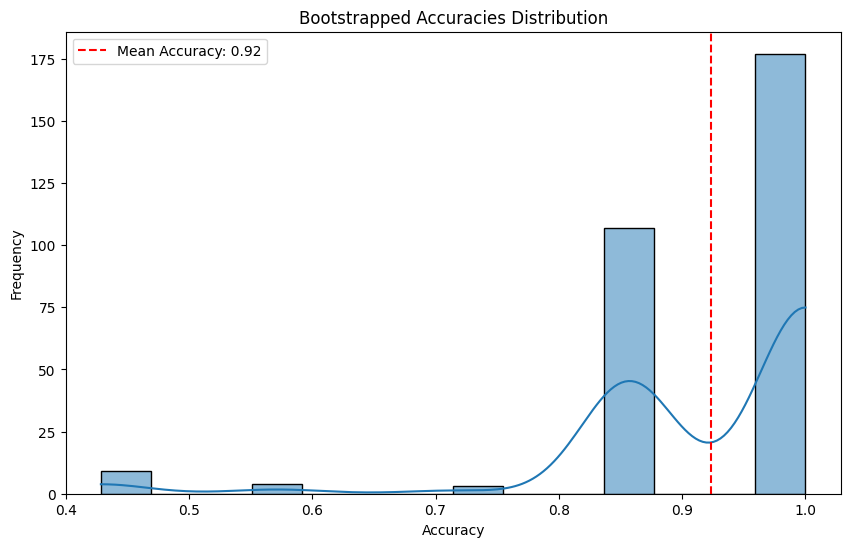

In [135]:
# Load the dataset
def svm_bootstrap(df,features,target='關鍵TA', test_size=0.2, random_state=42, n_bootstraps=100):
    df = scores_df.copy()    
    encoder = LabelEncoder()
    df[target] = encoder.fit_transform(df[target])
    
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=test_size, random_state=random_state)
    
    classifier = SVC(kernel='rbf', random_state=random_state)
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_test_pred = classifier.predict(X_test)

    bootstrap_accuracies = []
    # bootstrapping 
    for _ in range(n_bootstraps):
        # TODO: wrap try catch here in case we get all TA's
        X_train_boot, y_train_boot = resample(X_train, y_train)
        classifier.fit(X_train_boot, y_train_boot)
        # Predict on the original testing data
        y_test_pred_boot = classifier.predict(X_test)
        bootstrap_accuracies.append(accuracy_score(y_test, y_test_pred_boot))
    bootstrap_accuracies = np.array(bootstrap_accuracies)
    mean_accuracy = bootstrap_accuracies.mean()
    std_dev_accuracy = bootstrap_accuracies.std()
    
    # Plot the distribution of accuracies
    len_training = len(X_train)
    len_testing = len(X_test)
    print(f'用{len_training}位訓練，{len_testing}位盲測')
    plt.figure(figsize=(10, 6))
    sns.histplot(bootstrap_accuracies, kde=True)
    plt.title('Bootstrapped Accuracies Distribution')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.axvline(x=mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
    plt.legend()
    plt.show()
    return classifier, bootstrap_accuracies
svm, bootstrap_accuracies  = svm_bootstrap(ta_df, inside_features + outside_features, n_bootstraps=300)
lowest_accuracy = bootstrap_accuracies.min()
highest_accuracy = bootstrap_accuracies.max()

用25位訓練，7位盲測


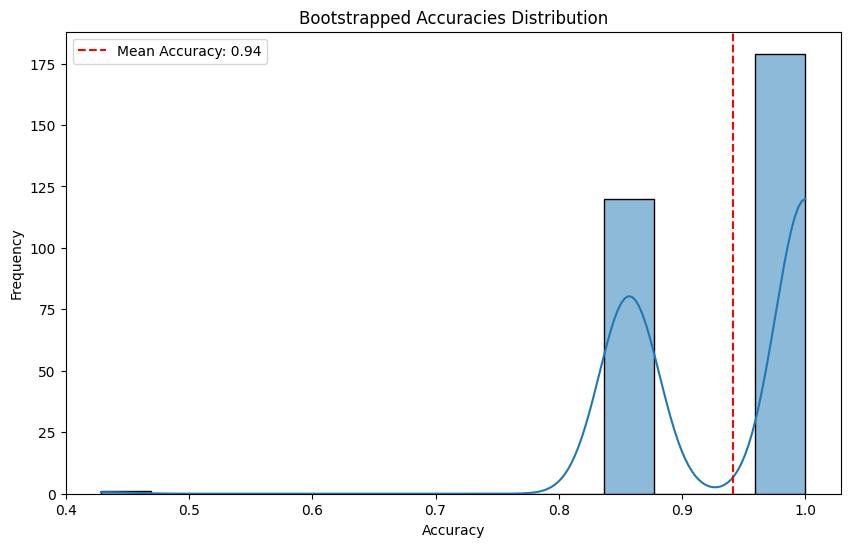

lowest accuracy: 0.42857142857142855 
highest accuracy: 1.0


In [124]:
# Find the lowest accuracy achieved in the bootstrapping process
lrm, bootstrap_accuracies  = logistic_regression_bootstrap(ta_df, inside_features, n_bootstraps=300)
lowest_accuracy = bootstrap_accuracies.min()
highest_accuracy = bootstrap_accuracies.max()
# Number of samples in the training and testing sets
print(f"lowest accuracy: {lowest_accuracy} \nhighest accuracy: {highest_accuracy}")

## 基本資料分析 Data Analysis


In [179]:
from plotly.graph_objs import Margin
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import math
inside_features = ['工作意願和動機', '學習動力', '基本溝通表達', '工作責任感', '解決問題意願']
outside_features = ['自我身心照顧', '社群和社交活動', '家人支持程度','私人企業工作經驗','量化求職考量','先天後天']
ppss_features = ['PPSS積極性','PPSS責任性','PPSS成熟性','PPSS務實性','PPSS社交性','PPSS合群性','PPSS創意性','PPSS表達性','PPSS學習性','PPSS細心','PPSS耐心','PPSS親和性','PPSS領導性','PPSS邏輯性']
key_ppss_features = ['PPSS表達性','PPSS責任性','PPSS學習性']

MAX_VALUES = {'工作意願和動機': 7,
              '學習動力': 3,
              '基本溝通表達': 3,
              '工作責任感': 3,
              '解決問題意願': 3,
              '社群和社交活動': 3,
              '家人支持程度': 5,
              '私人企業工作經驗': 1,
              '量化求職考量': 3,  
              '先天後天': 1,
              '自我身心照顧': 6}

def generate_radar_charts(df,features,charts_per_row):
    n_rows =  math.ceil(len(df) / charts_per_row)
    # Create a subplot layout
    fig = make_subplots(rows=n_rows,
                        cols=charts_per_row,
                        specs=[[{'type': 'polar'}]*charts_per_row]*n_rows,
                        vertical_spacing = 0.15,
                        horizontal_spacing = 0.20,
                        subplot_titles=(df.受訪者)
                        )

    layout_update = {}
    features_closed = features[0:] + [features[0]]

    for index, row in df.iterrows():
        row_normalized = {col: row[col] / MAX_VALUES[col] for col in features[0:]}
        row_normalized_list = list(row_normalized.values()) + [list(row_normalized.values())[0]]

        subplot_row = index // charts_per_row + 1
        subplot_col = index % charts_per_row + 1
        polar_name = f'polar{index+1}'
        layout_update[polar_name] = dict(radialaxis=dict(showticklabels=False))

        fig.add_trace(
            go.Scatterpolar(
              name=row.受訪者,
              r=row_normalized_list,
              theta=features_closed,
              fill='toself',
              showlegend=False,
          ), row=subplot_row, col=subplot_col)


    # Update layout to remove radial tick labels and adjust layout
    fig.update_layout(
        **layout_update,
        margin=dict(t=50,b=50, l=100, r=100),
        height=1000,
    )
    fig.show()    

### 關鍵TA雷達圖 vs. 非關鍵TA雷達圖

In [268]:
ta_df[['受訪者'] + inside_features + outside_features]

,受訪者,工作意願和動機,學習動力,基本溝通表達,工作責任感,解決問題意願,社群和社交活動,家人支持程度,私人企業工作經驗,量化求職考量,先天後天,自我身心照顧
0,0913H,4,3,3,3,3,2,2,0,3,1,6
1,0915J,5,2,2,3,2,2,1,0,1,1,6
2,0920L,3,2,1,3,3,3,4,0,2,1,3
3,0929Q,5,3,3,3,3,3,2,1,2,1,6
4,0929R,5,3,3,3,3,1,4,1,2,0,4
5,1007T,5,3,3,3,3,1,4,1,3,1,6
6,1010U,4,2,3,2,2,2,1,1,1,0,4
7,1010V,4,2,3,2,2,2,3,0,1,1,6
8,1014X,4,2,3,2,3,2,2,1,2,1,4
9,1018Z,5,3,3,3,3,2,2,1,3,0,6


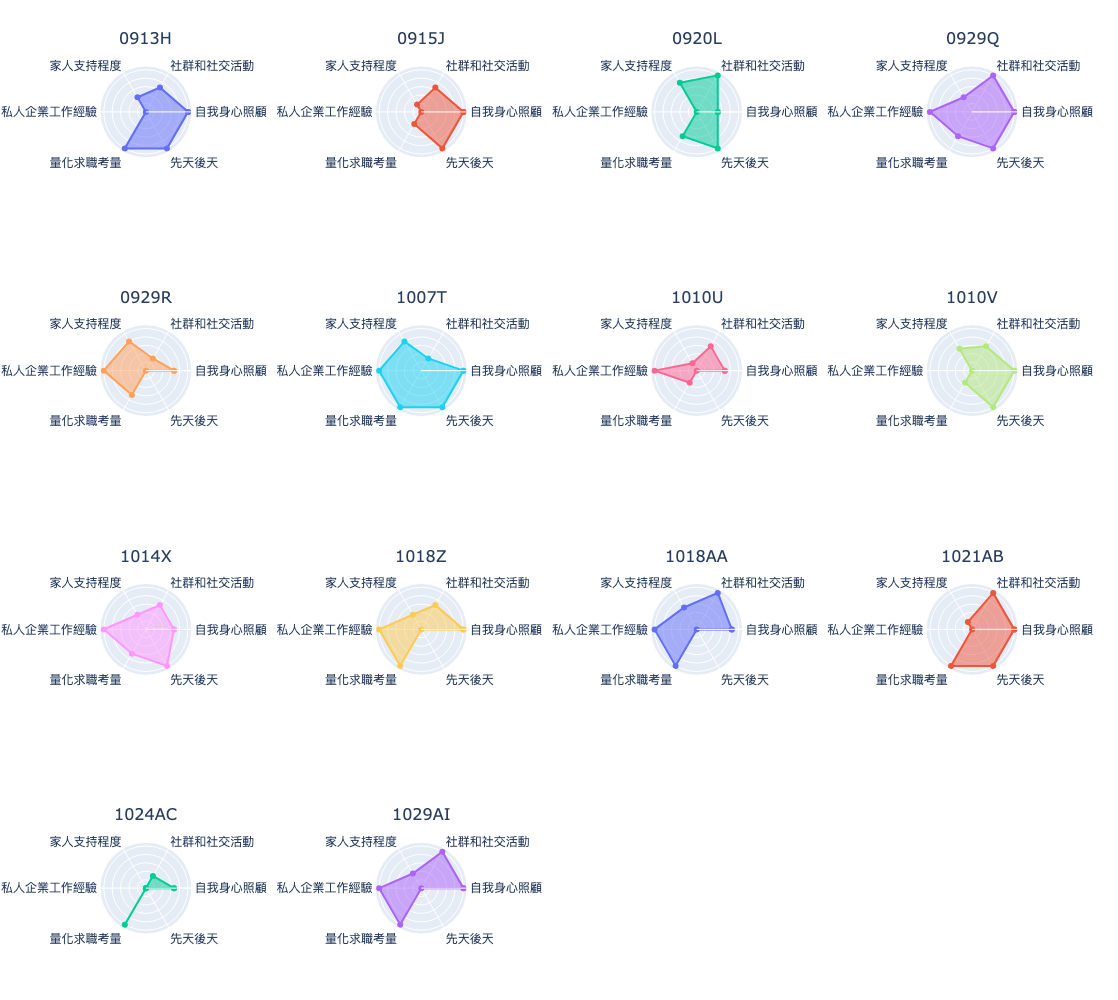

In [189]:
# TODO: fix to just 6 qualities
# radar_features = inside_features + [outside_features[0]]
radar_features = outside_features
generate_radar_charts(ta_df, radar_features, charts_per_row=4)

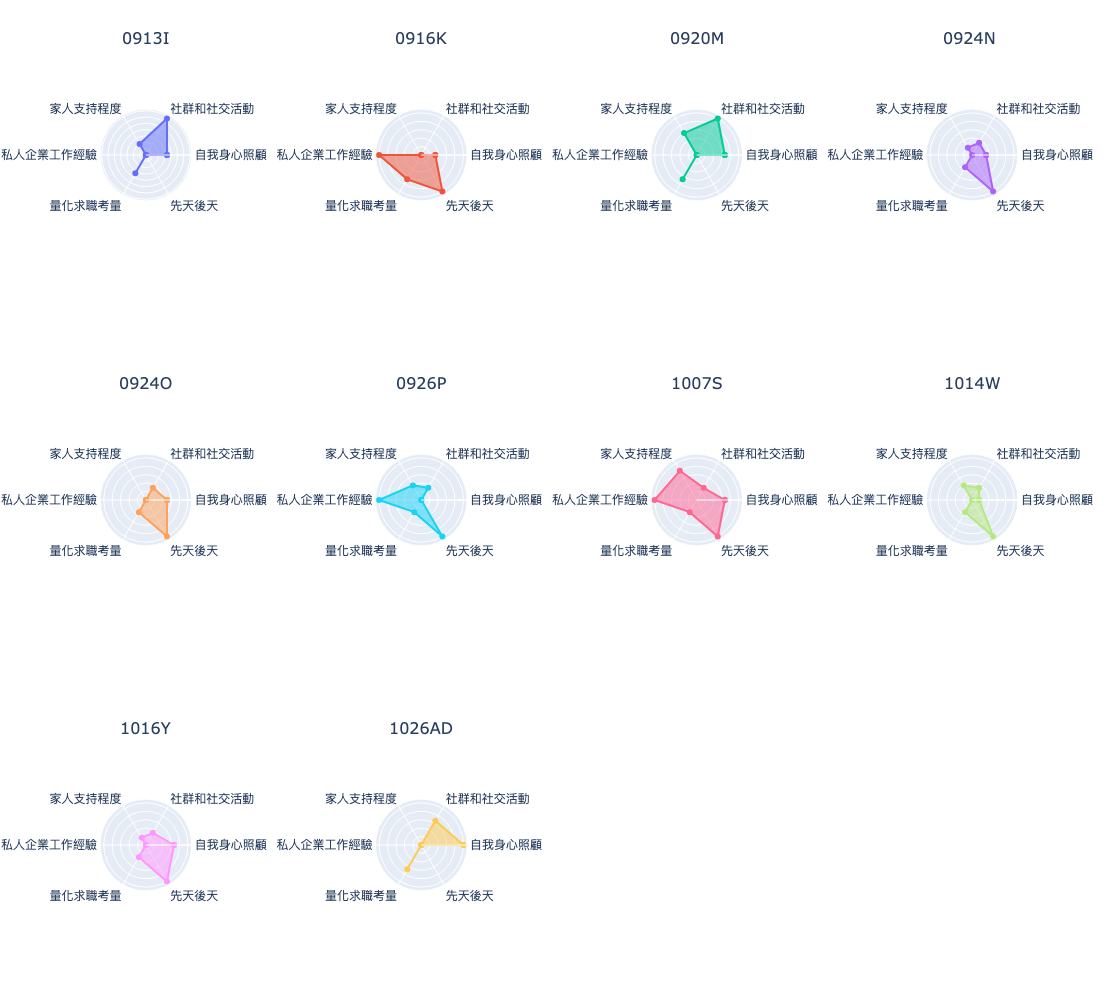

In [190]:
generate_radar_charts(nonta_df, radar_features, charts_per_row = 4)

## 關鍵TA相關矩陣

In [208]:
# from scipy.stats import spearmanr
corr_features = inside_features + outside_features
pearson_corr_matrix = ta_df[corr_features].corr()
# spearman_corr_matrix = ta_df[corr_features].corr(method='spearman')

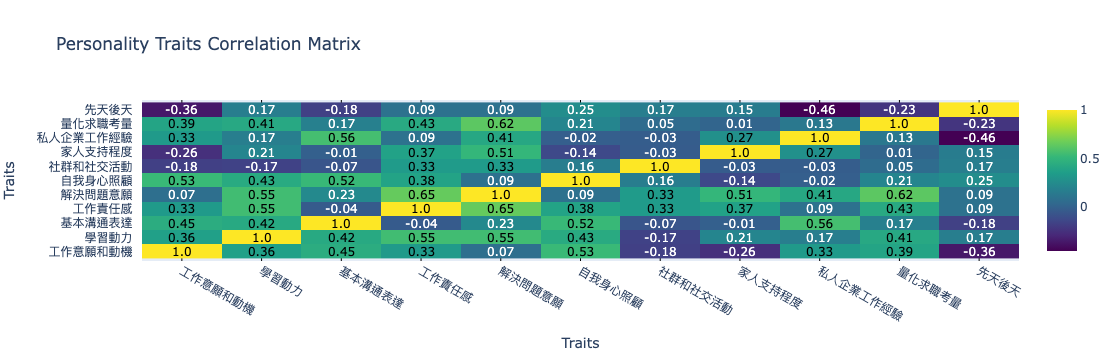

In [209]:
import plotly.figure_factory as ff

def plot_corr_matrix(corr_mx):
  fig = ff.create_annotated_heatmap(
      z=corr_mx.values,
      x=list(corr_mx.columns),
      y=list(corr_mx.index),
      annotation_text=corr_mx.round(2).values,
      colorscale='Viridis',
      showscale=True,
      hoverinfo='z'
  )
  fig.update_layout(
      title='Personality Traits Correlation Matrix',
      xaxis=dict(title='Traits', side='bottom'),
      yaxis=dict(title='Traits'),
  )
  fig.show()

plot_corr_matrix(pearson_corr_matrix)

## 問卷學歷
pie chart (同關鍵TA管道分析)


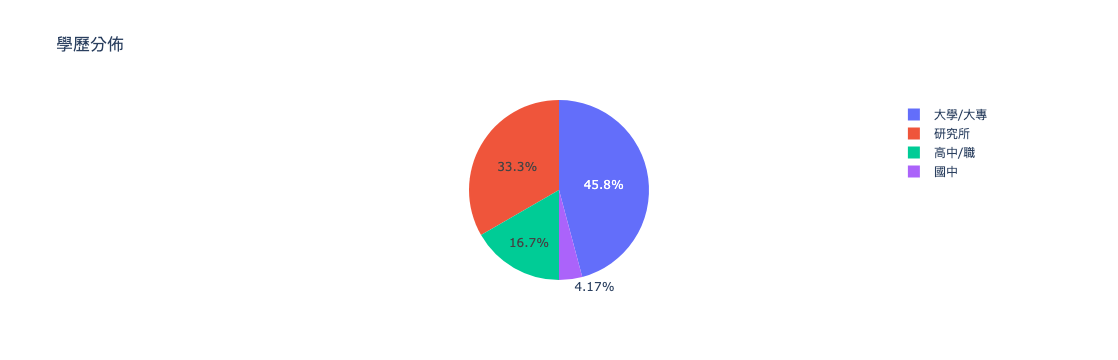

In [218]:
import plotly.express as px
from collections import Counter
jobs_df = scores_df[meta_features]
fig = px.pie(jobs_df, names='問卷學歷', title='學歷分佈')
fig.show()

## 經歷長條圖
直接mix(關鍵 & 非關鍵TA)


## 求職考量
身障者的三大求職考量
1. 經濟需求
2. 工作性質與內容
3. 無障礙環境

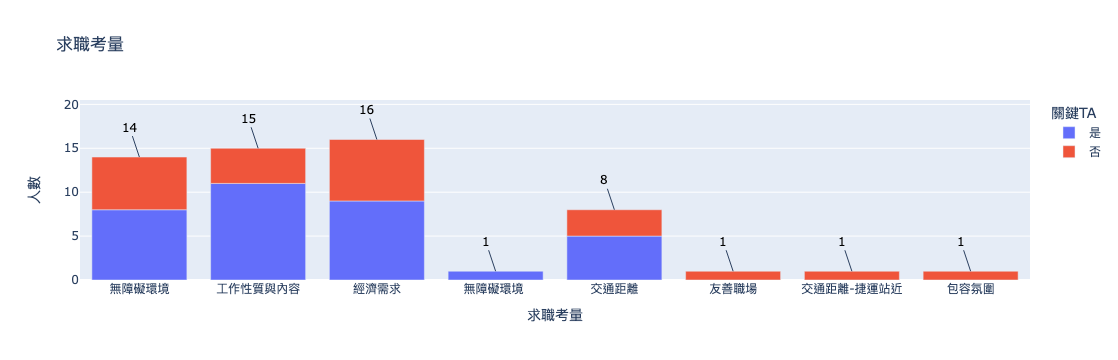

In [258]:
import plotly.express as px
from collections import Counter

def generate_job_consideration_chart(ta_df, nonta_df):
    # Count job considerations for both subsets
    jc_true = ta_df['求職考量'].str.split('、').explode()
    jc_false = nonta_df['求職考量'].str.split('、').explode()
    jc_counts_true = pd.Series(Counter(jc_true)).reset_index()
    jc_counts_false = pd.Series(Counter(jc_false)).reset_index()
    jc_counts_true.columns = ['求職考量', '人數']
    jc_counts_false.columns = ['求職考量', '人數']
    jc_counts_true['關鍵TA'] = '是'
    jc_counts_false['關鍵TA'] = '否'
    combined_counts_with_key_TA = pd.concat([jc_counts_true, jc_counts_false])
    total_counts = combined_counts_with_key_TA.groupby('求職考量')['人數'].sum().reset_index()
    
    fig = px.bar(combined_counts_with_key_TA, x='求職考量', y='人數', color='關鍵TA',
                 title='求職考量',
                 labels={'人數': '人數', '求職考量': '求職考量', '關鍵TA': '關鍵TA'})
    
    # Add text annotations for total counts
    for i, row in total_counts.iterrows():
        fig.add_annotation(
            x=row['求職考量'],
            y=row['人數'],
            text=str(row['人數']),
            showarrow=True,
            font=dict(
                size=12,
                color="black"
            )
        )
    fig.show()

generate_job_consideration_chart(ta_df, nonta_df)

## 關鍵TA管道分析

In [249]:
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px

def get_job_channel(df):
  # Initialize a Counter to keep track of the frequencies of each unique item
  item_counter = Counter()

  # Go through each row in the "問卷求職管道" column, split the items by "、", and update the counter
  for entry in df["問卷求職管道"]:
      items = entry.split("、")
      item_counter.update(items)

  # Convert the counter to a dictionary and sort it by value in descending order
  item_dict = dict(sorted(item_counter.items(), key=lambda x: x[1], reverse=True))
  return item_dict

ModuleNotFoundError: No module named 'matplotlib'

In [250]:
total_dict = get_job_channel(df)
fig = px.pie(names=total_dict.keys(), values=total_dict.values(), title='全部問卷求職管道')
fig.show()

NameError: name 'get_job_channel' is not defined

In [ ]:
ta_dict = get_job_channel(ta_df)
fig = px.pie(names=ta_dict.keys(), values=ta_dict.values(), title='TA問卷求職管道')
fig.show()

In [251]:
nonta_dict = get_job_channel(nonta_df)
fig = px.pie(names=nonta_dict.keys(), values=nonta_dict.values(), title='非TA問卷求職管道')
fig.show()

NameError: name 'get_job_channel' is not defined